In [1]:
import numpy as np
import pandas as pd
import os
import keras
import nltk

C:\Users\Lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATAPATH ='./nips-papers/'

In [29]:
dataset = pd.read_csv('./nips-papers/papers.csv', delimiter = ',')
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [31]:
dataset = dataset.drop(['title', 'event_type', 'pdf_name', 'abstract'], axis = 1)
dataset.head()

,id,year,paper_text
0,1,1987,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross\nValidation, a..."


In [32]:
dataset['word_count'] = dataset['paper_text'].apply(lambda x : len(str(x).split(" ")))
dataset.head()

,id,year,paper_text,word_count
0,1,1987,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315
1,10,1987,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233
2,100,1988,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727
3,1000,1994,Bayesian Query Construction for Neural\nNetwor...,2923
4,1001,1994,"Neural Network Ensembles, Cross\nValidation, a...",3009


In [33]:
dataset.word_count.describe()

count     7241.000000
mean      4259.252037
std       1237.864868
min          1.000000
25%       3211.000000
50%       4473.000000
75%       5194.000000
max      11519.000000
Name: word_count, dtype: float64

In [40]:
# identify common words

In [37]:
freq = pd.Series(' '.join(dataset['paper_text']).split()).value_counts()[:30]
freq

the     1741341
of       992459
and      737835
?        643837
a        585149
to       565402
is       496162
in       472178
for      350809
that     291198
=        282147
,        226448
we       226390
with     223759
The      208088
on       193614
.        190768
by       184927
are      182535
as       181125
be       171837
In       140913
1        129000
this     126679
)        126086
can      125262
We       124116
from     121057
an       114979
2        104534
dtype: int64

In [41]:
# identify uncommon words

In [42]:
freq1 =  pd.Series(' '.join(dataset 
         ['paper_text']).split()).value_counts()[-30:]
freq1

1.10.1              1
(MSB                1
lofmatrix           1
coordinate);        1
JxK(I)              1
Qiu-Hua             1
Singularities.      1
EucDRT,             1
didofanother        1
.t\_                1
ineffable           1
drug-sales          1
4(2):490?530,       1
??)Q,               1
0.7563?0.0298       1
?)s(0)              1
(621.2756)          1
1700?1705,          1
KK                1
WiQ                 1
distribu132*4%     1
prod?               1
ep(??hw             1
Int1.               1
PerCom,             1
(UCS-CRL-99-10),    1
abs/1611.03530,     1
f?(                 1
?(r)).              1
Vg-                 1
dtype: int64

## Text Pre-Processing:

-  text clean up </n>
-  shrinking the vocabulary to retain only relevant / important words </n>
-  resuce sparsity
<img src ="img2.png">


**Sparsity** : In text mining, huge matrices are created based on word frequencies with many cells having zero values. This problem is called sparsity and is minimized using various techniques.</n>

**Text pre-processing** can be divided into two broad categories </n>
-  noise removal </n>
-  normalization. </n>

Data components that are redundant to the core text analytics can be considered as noise.

<img src ="img1.png">

Handling multiple occurances/ representations of the same word is known as **normalization**.

There are two types of normalization 

- stemming 
- lemmatization

**Stemming** normalizes the word by removing suffixes.

**Lemmatisation** is a more advanced technique which works based on the root of the word.




In [43]:
# example of lemmatisation and stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [55]:
# Libraries for text preprocessing
import re # import Regular Expression library
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
# Stopwords include larger number of prepositions, pronouns, conjunction etc in sentence

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

**Removing stopwords**: Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences. These words need to be removed before we analyse the text, so that the frequently used words are mainly the words relevant to the context and not common words used in the text.

There is a default list of stopwords in python nltk library.In addition, we might want to add context specific stopwords for which the “most common words” that we listed in the beginning will be helpful.

In [54]:
stop_words = set(stopwords.words("english"))
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

**Regular expression** are used to identify whether a pattern exists in a given sequence of characters (strings) or not. They help in manipulating textual data which is often pre-requisite for data science projects involves text mining. 

In [60]:
# produce normalized text:

corpus = []
for i in range (0, 7240):
    # Remove punctuations
    text= re.sub('[^a-zA-Z]', ' ', dataset['paper_text'][i])
    
    # Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [62]:
corpus[200]

'balancing bagging bumping tom heskes rwcp novel function snn laboratory university nijmegen geert grooteplein ez nijmegen netherlands tom mbfys kun nl abstract compare different method combine prediction neural network trained different bootstrap sample regression problem method introduced call balancing based analysis ensemble generalization error ambiguity term term incorporating generalization performance individual network estimate individual error residual validation pattern weighting factor different network follow quadratic programming problem real world problem concerning prediction sale figure well known boston housing data set balancing clearly outperforms recently proposed alternative bagging bumping early stopping bootstrapping stopped training popular strategy prevent overfitting neural network complete data set split training validation set learning weight adapted order minimize error training data training stopped error validation data start increasing final network dep

## Text Preparation

Text in the corpus needs to be converted to a format that can be interpreted by the machine learning algorithms. There are 2 parts of this conversion
-  Tokenisation  
-  Vectorisation.

**Tokenisation** is the process of converting the continuous text into a list of words. The list of words is then converted to a matrix of integers by the process of **vectorisation**. Vectorisation is also called feature extraction.



## Creating a vector of word counts

We will use *CountVectorizer* to tokenize the text and build vocabulary of known words. 

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [74]:
list(cv.vocabulary_.keys())[:10]

['self',
 'organization',
 'associative',
 'database',
 'application',
 'japan',
 'efficient',
 'organizing',
 'proposed',
 'together']

## Visualize top N uni-grams, bi-grams and tri-grams



[Text(0,0,'model'),
 Text(0,0,'algorithm'),
 Text(0,0,'learning'),
 Text(0,0,'function'),
 Text(0,0,'data'),
 Text(0,0,'set'),
 Text(0,0,'network'),
 Text(0,0,'method'),
 Text(0,0,'problem'),
 Text(0,0,'time'),
 Text(0,0,'distribution'),
 Text(0,0,'number'),
 Text(0,0,'figure'),
 Text(0,0,'matrix'),
 Text(0,0,'value'),
 Text(0,0,'parameter'),
 Text(0,0,'feature'),
 Text(0,0,'image'),
 Text(0,0,'training'),
 Text(0,0,'state')]

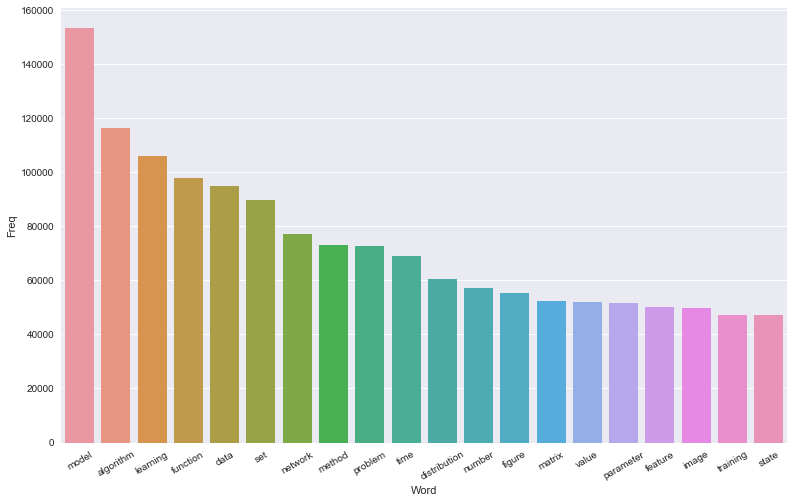

In [78]:
#Most frequently occuring words

import matplotlib.pyplot as plt
%matplotlib inline
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                     Bi-gram   Freq
0                      et al  20578
1             neural network  20085
2           machine learning  15768
3                   data set   9594
4     information processing   9585
5         neural information   9098
6          processing system   9044
7               training set   7641
8         learning algorithm   7215
9                lower bound   7110
10  international conference   6900
11            advance neural   6816
12               figure show   5955
13             training data   5869
14             loss function   5740
15                   log log   5692
16      optimization problem   5590
17               upper bound   5552
18                data point   5443
19           random variable   5212


[Text(0,0,'et al'),
 Text(0,0,'neural network'),
 Text(0,0,'machine learning'),
 Text(0,0,'data set'),
 Text(0,0,'information processing'),
 Text(0,0,'neural information'),
 Text(0,0,'processing system'),
 Text(0,0,'training set'),
 Text(0,0,'learning algorithm'),
 Text(0,0,'lower bound'),
 Text(0,0,'international conference'),
 Text(0,0,'advance neural'),
 Text(0,0,'figure show'),
 Text(0,0,'training data'),
 Text(0,0,'loss function'),
 Text(0,0,'log log'),
 Text(0,0,'optimization problem'),
 Text(0,0,'upper bound'),
 Text(0,0,'data point'),
 Text(0,0,'random variable')]

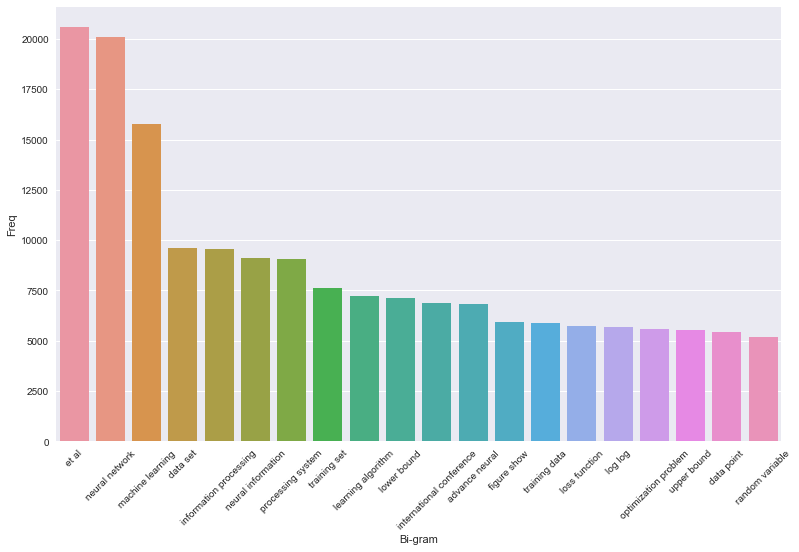

In [80]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                            Tri-gram  Freq
0      neural information processing  8996
1      information processing system  8851
2         advance neural information  6687
3               arxiv preprint arxiv  3621
4        conference machine learning  3544
5   international conference machine  3368
6          machine learning research  3220
7           journal machine learning  3077
8             processing system page  2644
9              processing system nip  2441
10            support vector machine  2364
11       th international conference  1615
12       department computer science  1535
13                       log log log  1519
14               hidden markov model  1504
15          recurrent neural network  1501
16       proceeding th international  1464
17     conference neural information  1452
18          semi supervised learning  1452
19       stochastic gradient descent  1383


[Text(0,0,'neural information processing'),
 Text(0,0,'information processing system'),
 Text(0,0,'advance neural information'),
 Text(0,0,'arxiv preprint arxiv'),
 Text(0,0,'conference machine learning'),
 Text(0,0,'international conference machine'),
 Text(0,0,'machine learning research'),
 Text(0,0,'journal machine learning'),
 Text(0,0,'processing system page'),
 Text(0,0,'processing system nip'),
 Text(0,0,'support vector machine'),
 Text(0,0,'th international conference'),
 Text(0,0,'department computer science'),
 Text(0,0,'log log log'),
 Text(0,0,'hidden markov model'),
 Text(0,0,'recurrent neural network'),
 Text(0,0,'proceeding th international'),
 Text(0,0,'conference neural information'),
 Text(0,0,'semi supervised learning'),
 Text(0,0,'stochastic gradient descent')]

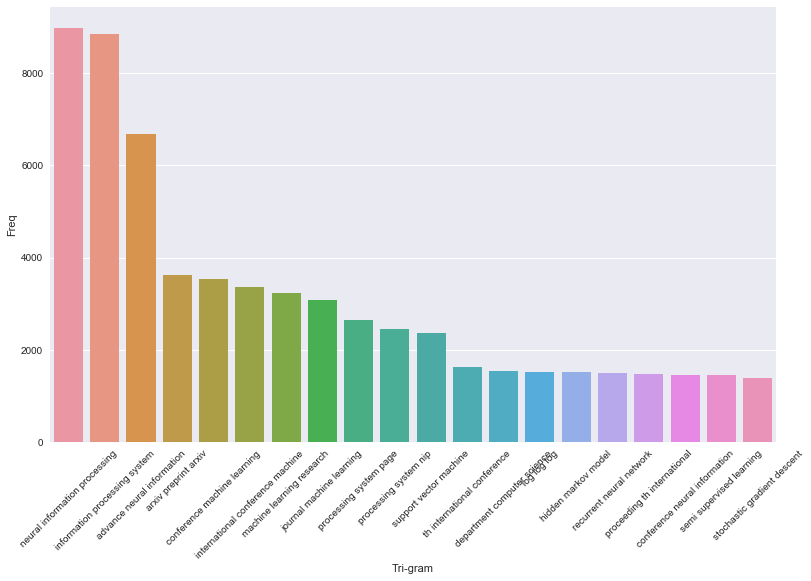

In [82]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [86]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
reinforcement learning algorithm partially observable environment short term memory nobuo suematsu akira hayashi faculty computer science hiroshima city university ozuka higashi asaminami ku hiroshima japan suematsu akira im hiroshima cu ac jp abstract describe reinforcement learning algorithm partially observable environment short term memory call blht since blht learns stochastic model based bayesian learning overfitting problem reasonably solved moreover blht efficient implementation paper show model learned blht converges provides accurate prediction percept reward given short term memory introduction research reinforcement learning rl problem partially observable environment gaining attention recently mainly assumption perfect complete perception state environment available learning agent many previous rl algorithm require valid many realistic environment model free figure three approach approach problem model free approach singh et al jaakkola et al arrow fig l give st